In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
dfx = pd.read_csv('xdata.csv')
dfy = pd.read_csv('ydata.csv')

In [22]:
print(dfx.head(n = 3))
print(dfy.head(n =3))

   0  3.4821055700010444  2.4203917879404533
0  1            3.516279            3.719750
1  2            4.606496            3.414379
2  3            4.677011            3.047244
   0  0.0
0  1  0.0
1  2  0.0
2  3  0.0


In [26]:
X = dfx.iloc[:, 1:]
Y = dfy.iloc[:, 1:]

In [84]:
dfy.iloc[:,1:].value_counts() # doing this to check the class imbalance

0.0
1.0    200
0.0    199
Name: count, dtype: int64

In [30]:
x = X.values
y = Y.values

print(x.shape, y.shape)

(399, 2) (399, 1)


In [50]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, shuffle = True)

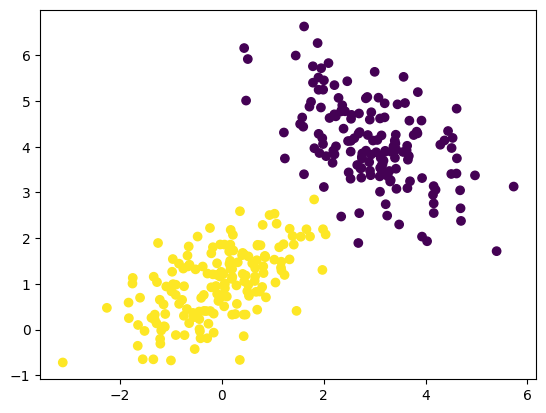

In [140]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train)
plt.show()

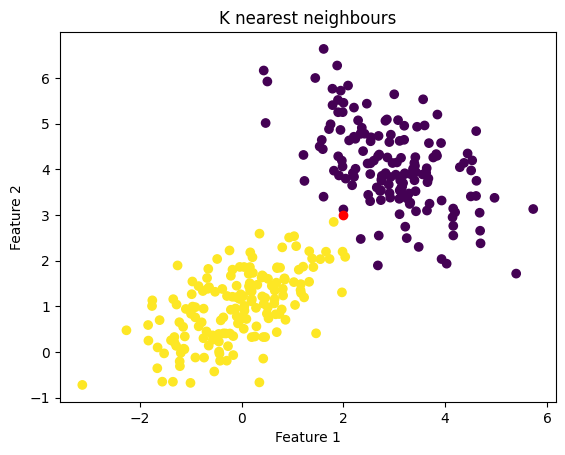

In [142]:
query_x = np.array([2, 3])
plt.scatter(X_train[:, 0], X_train[:, 1], c = Y_train)
plt.title('K nearest neighbours')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.scatter(query_x[0], query_x[1], color = 'red' )
plt.show()

In [144]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [198]:
def knn(x_train, y_train, queryPoint, k = 5):
    vals = []
    m = x_train.shape[0] 
    for i in range(m):
        d = dist(queryPoint, x_train[i])
        vals.append((d, int(y_train[i]))) # distamce is kept on the first place because by deafult it gets sorted on the first label

    vals = sorted(vals)

    vals = vals[:k]

    vals = np.array(vals)
    new_vals = np.unique(vals[:, 1], return_counts = True )
    new_vals = np.array(new_vals)

    index = new_vals[1].argmax() # importantto understand the usage of argmax function
    pred = new_vals[0][index]  
    
    
    return pred
    
        

In [200]:
knn(X_train, Y_train, query_x)

/var/folders/l0/pnhclb4s2fl_n5xpymwnh_j00000gn/T/ipykernel_50721/2541135341.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  vals.append((d, int(y_train[i]))) # distamce is kept on the first place because by deafult it gets sorted on the first label


0.0

/var/folders/l0/pnhclb4s2fl_n5xpymwnh_j00000gn/T/ipykernel_50721/1871397033.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(y_train[243])


1